### Nagendra Babu
### Data Science and Business Analytics Internship @ The Sparks Foundation
#### GRIPMAY21

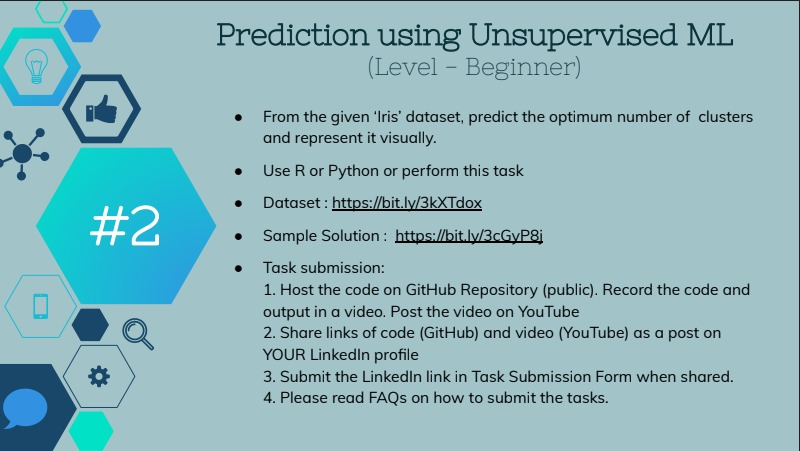

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

### Importing the Iris dataset¶

In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x = iris_data.iloc[:,:].values

In [4]:
iris_data.shape

(150, 4)

In [5]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Knowing missing values

In [6]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Statistical Properties of Dataset

In [7]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing the data

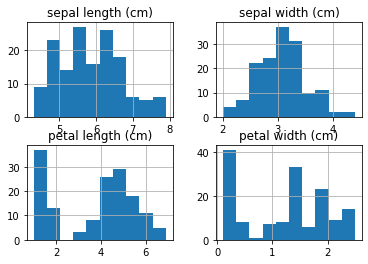

In [8]:
iris_data.hist()
plt.show()

### Analysing correlation between features

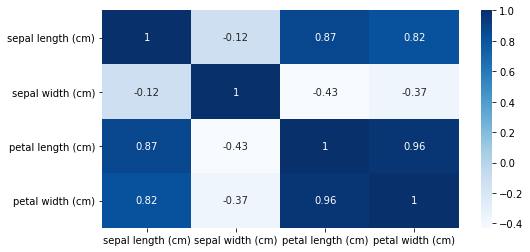

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues');

### Visualising the sepal and petal dimensions¶

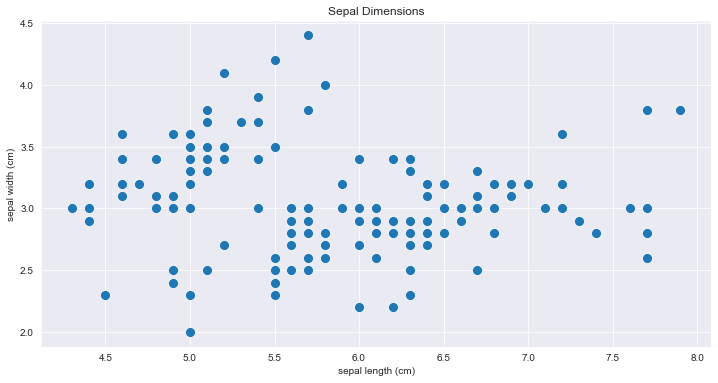

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["sepal length (cm)"], 
                y=iris_data["sepal width (cm)"], 
                s=100);


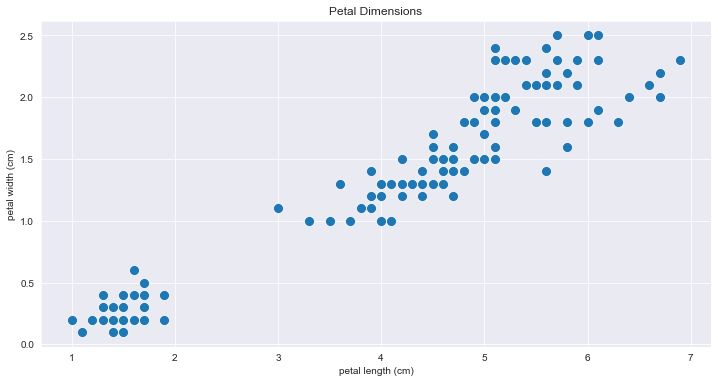

In [11]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"], 
                y=iris_data["petal width (cm)"], 
                s=100);


### Finding the optimal number of clusters

C:\Users\SuresH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


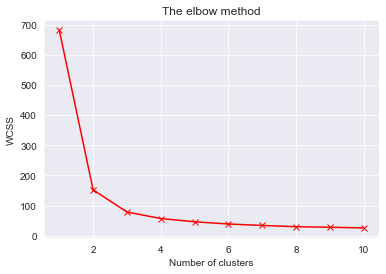

In [12]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x[:,0:4])
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


From the above curve we can see that the elbow point is at 3
so, the number of clusters=3

### Implementing the k-means to the dataset

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x[:,0:4])
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Visualizing the clusters

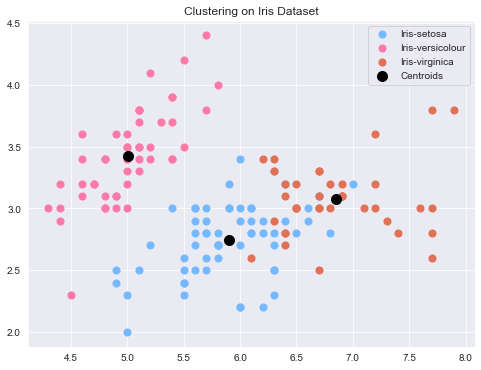

In [14]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = '#74b9ff', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = '#fd79a8', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = '#e17055', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')


plt.title("Clustering on Iris Dataset")

plt.legend()